## Library import + definition of the network


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from library_2GMM import*

class TwoLayerDenoiser(nn.Module):
    def __init__(self, n, hidden_dim=256, L=3):
        super(TwoLayerDenoiser, self).__init__()
        self.lin0 = nn.Linear(42, L)                  # Time embedding φ → s
        self.lin1 = nn.Linear(n, hidden_dim)          # Input projection x → x1
        self.lin2 = nn.Linear(hidden_dim * L, n)      # Output projection

    def forward(self, x, alpha):
        batch_size = x.shape[0]
        alpha = alpha.unsqueeze(1)

        i_values = torch.arange(21, dtype=torch.float32, device=x.device)
        phi = torch.cat([torch.cos(alpha * i_values), torch.sin(alpha * i_values)], dim=1)

        s = self.lin0(phi)
        x1 = F.tanh(self.lin1(x))

        outer_product = torch.einsum("bi,bj->bij", s, x1)  # Shape: (B, L, hidden_dim)
        x2 = outer_product.view(batch_size, -1)

        x_out = self.lin2(x2) + torch.cos(alpha).pow(2) * x
        return x_out


# Study of the RELU network in different scenarios

In [2]:
n = 128
p = 0.7
a = np.ones(n)
t_sharp = 2
alpha_change = np.arctan(np.sqrt(t_sharp))

# 1st setting
samples = 5000,
epochs = 500,
hidden_dim = 256,
L = 3


In [3]:
num_samples = 5000
epochs = 500
hidden_dim = 256
L = 3

samples = construct_dataset(n, p, a, num_samples)

denoiser1_sigmoidal = TwoLayerDenoiser(n)
denoiser1_linear = TwoLayerDenoiser(n)


training(denoiser1_sigmoidal, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_min = 0,
             alpha_max = alpha_change+0.05)

training(denoiser1_linear, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_min = alpha_change-0.05,
             alpha_max = np.pi/2- 0.01)


Epoch [1/500] | Train Loss: 0.8206 | Val Loss: 79.9397% | 
Epoch [51/500] | Train Loss: 0.7793 | Val Loss: 79.3235% | 
Epoch [101/500] | Train Loss: 0.7670 | Val Loss: 79.7359% | 
Epoch [151/500] | Train Loss: 0.7644 | Val Loss: 79.2445% | 
Epoch [201/500] | Train Loss: 0.7665 | Val Loss: 79.8021% | 
Epoch [251/500] | Train Loss: 0.7682 | Val Loss: 78.5647% | 
Epoch [301/500] | Train Loss: 0.7626 | Val Loss: 79.3011% | 
Epoch [351/500] | Train Loss: 0.7538 | Val Loss: 79.3416% | 
Epoch [401/500] | Train Loss: 0.7622 | Val Loss: 79.1561% | 
Epoch [451/500] | Train Loss: 0.7549 | Val Loss: 78.8999% | 
Loaded best model with validation loss: 78.1530%
Epoch [1/500] | Train Loss: 0.1493 | Val Loss: 29.8673% | 
Epoch [51/500] | Train Loss: 0.1398 | Val Loss: 30.6261% | 
Epoch [101/500] | Train Loss: 0.1385 | Val Loss: 30.0476% | 
Epoch [151/500] | Train Loss: 0.1371 | Val Loss: 29.7412% | 
Epoch [201/500] | Train Loss: 0.1351 | Val Loss: 30.3840% | 
Epoch [251/500] | Train Loss: 0.1343 | Val

0

In [4]:
K = 200
target_samples1 = forward_sampling(alpha_change, K, denoiser1_sigmoidal, n, path=False)*t_sharp
target_samples1 = forward_sampling_second_phase(target_samples1, alpha_change, np.pi/2-0.2, K, denoiser1_linear, n)

T max: 2.00


/Users/edotarci/Desktop/eth/2nd sem/semester project/codes april/library_2GMM.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_samples = target_samples + delta_t * drift + torch.sqrt(torch.tensor(delta_t)) * noise


T max: 24.34


/Users/edotarci/Desktop/eth/2nd sem/semester project/codes april/library_2GMM.py:228: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_samples = target_samples + delta_t * drift + torch.sqrt(torch.tensor(delta_t)) * noise


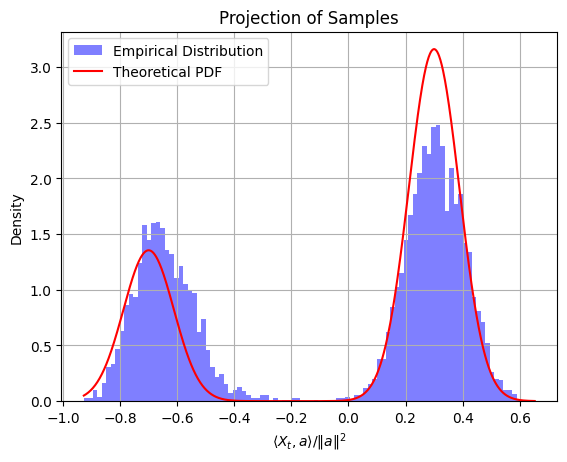

In [5]:
plot_projected_dataset(target_samples1, a, p, n)

# 2nd setting

In [6]:
num_samples = 20000
epochs = 500
hidden_dim = 256
L = 3

samples = construct_dataset(n, p, a, num_samples)

denoiser2_sigmoidal = TwoLayerDenoiser(n)
denoiser2_linear = TwoLayerDenoiser(n)


training(denoiser2_sigmoidal, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_min = 0,
             alpha_max = alpha_change+0.05)

training(denoiser2_linear, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_min = alpha_change-0.05,
             alpha_max = np.pi/2- 0.01)


Epoch [1/500] | Train Loss: 0.7853 | Val Loss: 79.3401% | 
Epoch [51/500] | Train Loss: 0.7624 | Val Loss: 78.6090% | 
Epoch [101/500] | Train Loss: 0.7686 | Val Loss: 78.7396% | 
Epoch [151/500] | Train Loss: 0.7638 | Val Loss: 79.0908% | 
Epoch [201/500] | Train Loss: 0.7643 | Val Loss: 78.6482% | 
Epoch [251/500] | Train Loss: 0.7596 | Val Loss: 78.7745% | 
Epoch [301/500] | Train Loss: 0.7636 | Val Loss: 78.9273% | 
Epoch [351/500] | Train Loss: 0.7679 | Val Loss: 78.4300% | 
Epoch [401/500] | Train Loss: 0.7640 | Val Loss: 78.5043% | 
Epoch [451/500] | Train Loss: 0.7655 | Val Loss: 78.6282% | 
Loaded best model with validation loss: 78.2478%
Epoch [1/500] | Train Loss: 0.1408 | Val Loss: 29.8050% | 
Epoch [51/500] | Train Loss: 0.1375 | Val Loss: 30.1913% | 
Epoch [101/500] | Train Loss: 0.1373 | Val Loss: 30.2954% | 
Epoch [151/500] | Train Loss: 0.1388 | Val Loss: 30.2391% | 
Epoch [201/500] | Train Loss: 0.1362 | Val Loss: 30.1333% | 
Epoch [251/500] | Train Loss: 0.1376 | Val

0

# 3rd setting 

In [7]:
num_samples = 20000
epochs = 2000
hidden_dim = 256
L = 3


samples = construct_dataset(n, p, a, num_samples)

denoiser3_sigmoidal = TwoLayerDenoiser(n)
denoiser3_linear = TwoLayerDenoiser(n)


training(denoiser3_sigmoidal, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_min = 0,
             alpha_max = alpha_change+0.05)

training(denoiser3_linear, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_min = alpha_change-0.05,
             alpha_max = np.pi/2- 0.01)


Epoch [1/2000] | Train Loss: 0.7856 | Val Loss: 79.0664% | 
Epoch [51/2000] | Train Loss: 0.7645 | Val Loss: 78.7134% | 
Epoch [101/2000] | Train Loss: 0.7677 | Val Loss: 78.9278% | 
Epoch [151/2000] | Train Loss: 0.7628 | Val Loss: 78.7958% | 
Epoch [201/2000] | Train Loss: 0.7672 | Val Loss: 79.1741% | 
Epoch [251/2000] | Train Loss: 0.7630 | Val Loss: 78.9228% | 
Epoch [301/2000] | Train Loss: 0.7641 | Val Loss: 79.2706% | 
Epoch [351/2000] | Train Loss: 0.7661 | Val Loss: 78.4351% | 
Epoch [401/2000] | Train Loss: 0.7650 | Val Loss: 78.8687% | 
Epoch [451/2000] | Train Loss: 0.7646 | Val Loss: 78.7585% | 
Epoch [501/2000] | Train Loss: 0.7626 | Val Loss: 78.7995% | 
Epoch [551/2000] | Train Loss: 0.7668 | Val Loss: 78.7875% | 
Epoch [601/2000] | Train Loss: 0.7618 | Val Loss: 78.7307% | 
Epoch [651/2000] | Train Loss: 0.7624 | Val Loss: 79.0336% | 
Epoch [701/2000] | Train Loss: 0.7661 | Val Loss: 78.7889% | 
Epoch [751/2000] | Train Loss: 0.7647 | Val Loss: 78.8245% | 
Epoch [801/

0

# 4th setting

In [8]:
num_samples = 20000
epochs = 2000
hidden_dim = 512
L = 6

samples = construct_dataset(n, p, a, num_samples)

denoiser4_sigmoidal = TwoLayerDenoiser(n)
denoiser4_linear = TwoLayerDenoiser(n)


training(denoiser4_sigmoidal, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_min = 0,
             alpha_max = alpha_change+0.05)

training(denoiser4_linear, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_min = alpha_change-0.05,
             alpha_max = np.pi/2- 0.01)

Epoch [1/2000] | Train Loss: 0.7872 | Val Loss: 79.3526% | 
Epoch [51/2000] | Train Loss: 0.7655 | Val Loss: 78.7263% | 
Epoch [101/2000] | Train Loss: 0.7640 | Val Loss: 78.9796% | 
Epoch [151/2000] | Train Loss: 0.7683 | Val Loss: 78.6334% | 
Epoch [201/2000] | Train Loss: 0.7671 | Val Loss: 78.7603% | 
Epoch [251/2000] | Train Loss: 0.7634 | Val Loss: 78.5483% | 
Epoch [301/2000] | Train Loss: 0.7611 | Val Loss: 78.8655% | 
Epoch [351/2000] | Train Loss: 0.7645 | Val Loss: 78.6454% | 
Epoch [401/2000] | Train Loss: 0.7636 | Val Loss: 78.8137% | 
Epoch [451/2000] | Train Loss: 0.7654 | Val Loss: 78.7479% | 
Epoch [501/2000] | Train Loss: 0.7646 | Val Loss: 78.8151% | 
Epoch [551/2000] | Train Loss: 0.7682 | Val Loss: 79.0025% | 
Epoch [601/2000] | Train Loss: 0.7669 | Val Loss: 78.8242% | 
Epoch [651/2000] | Train Loss: 0.7603 | Val Loss: 78.7469% | 
Epoch [701/2000] | Train Loss: 0.7643 | Val Loss: 78.8985% | 
Epoch [751/2000] | Train Loss: 0.7674 | Val Loss: 78.8103% | 
Epoch [801/

0

In [11]:
alpha_max = np.pi/2-0.2
K = 200

target_samples1 = forward_sampling(alpha_change, K, denoiser1_sigmoidal, n, path=False)*t_sharp
target_samples1 = forward_sampling_second_phase(target_samples1, alpha_change, alpha_max, K, denoiser1_linear, n)

target_samples2 = forward_sampling(alpha_change, K, denoiser2_sigmoidal, n, path=False)*t_sharp
target_samples2 = forward_sampling_second_phase(target_samples2, alpha_change, alpha_max, K, denoiser2_linear, n)

target_samples3 = forward_sampling(alpha_change, K, denoiser3_sigmoidal, n, path=False)*t_sharp
target_samples3 = forward_sampling_second_phase(target_samples3, alpha_change, alpha_max, K, denoiser3_linear, n)

target_samples4 = forward_sampling(alpha_change, K, denoiser4_sigmoidal, n, path=False)*t_sharp
target_samples4 = forward_sampling_second_phase(target_samples4, alpha_change, alpha_max, K, denoiser4_linear, n)


datasets = [target_samples1, target_samples2, target_samples3, target_samples4]
titles = ["1)", "2)", "3)", "4)"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, samples in enumerate(datasets):
    plot_projected_dataset(samples, a, p, n, ax=axes[i])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()


T max: 2.00
T max: 24.34
T max: 2.00
T max: 24.34


: 

# Comparison with the true conditional mean
using setting 2

1


/Users/edotarci/Desktop/eth/2nd sem/semester project/codes april/library_2GMM.py:325: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  samples = torch.tensor(samples, dtype=torch.float32)


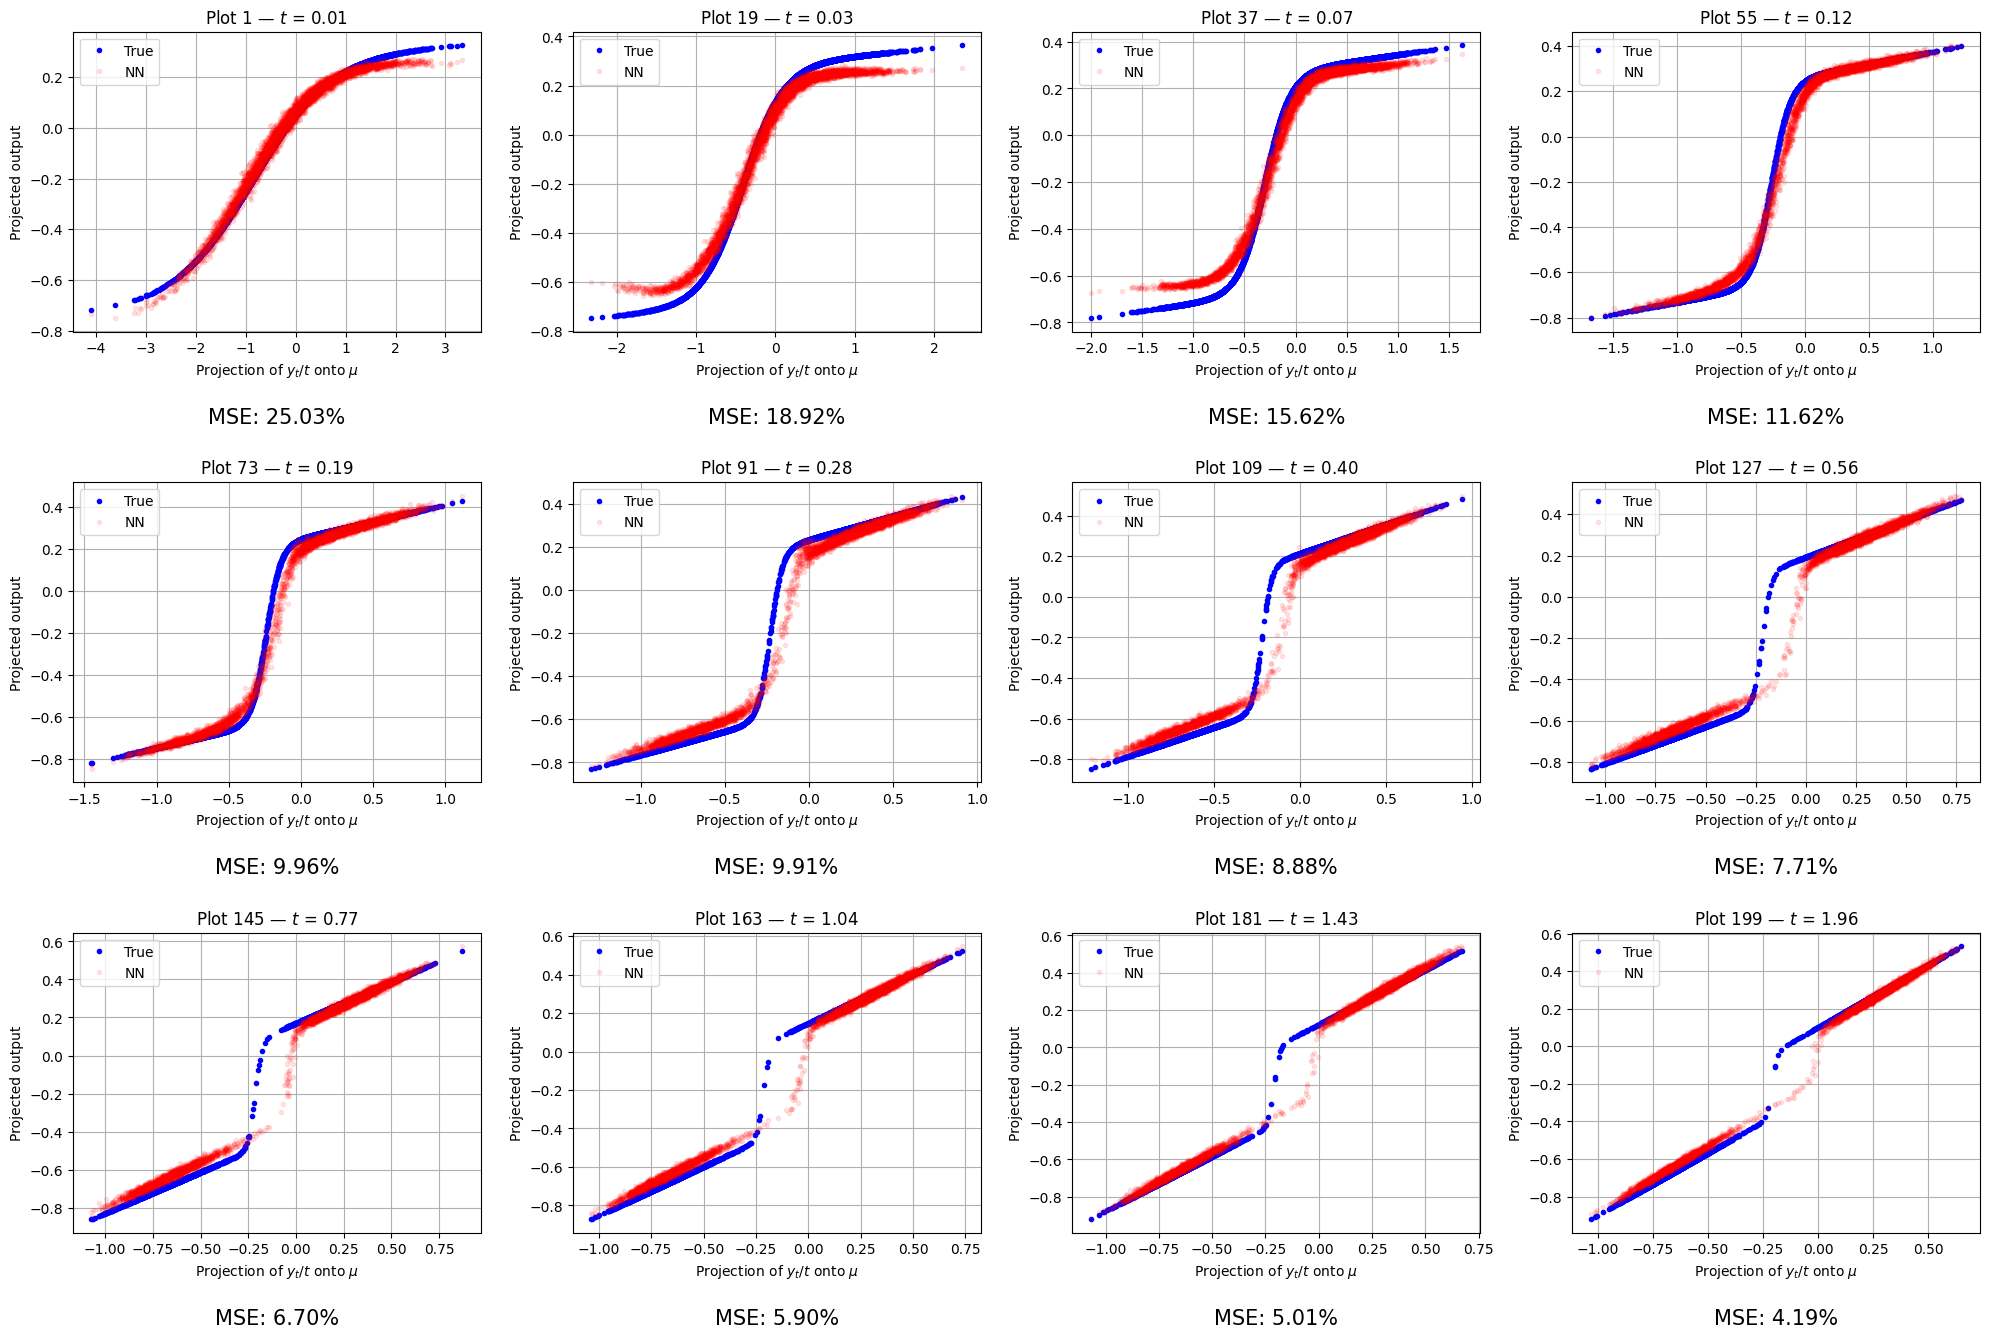

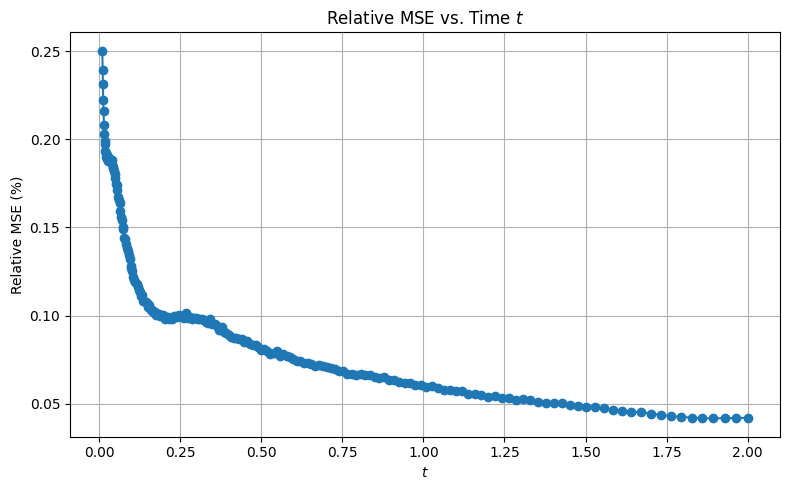

1


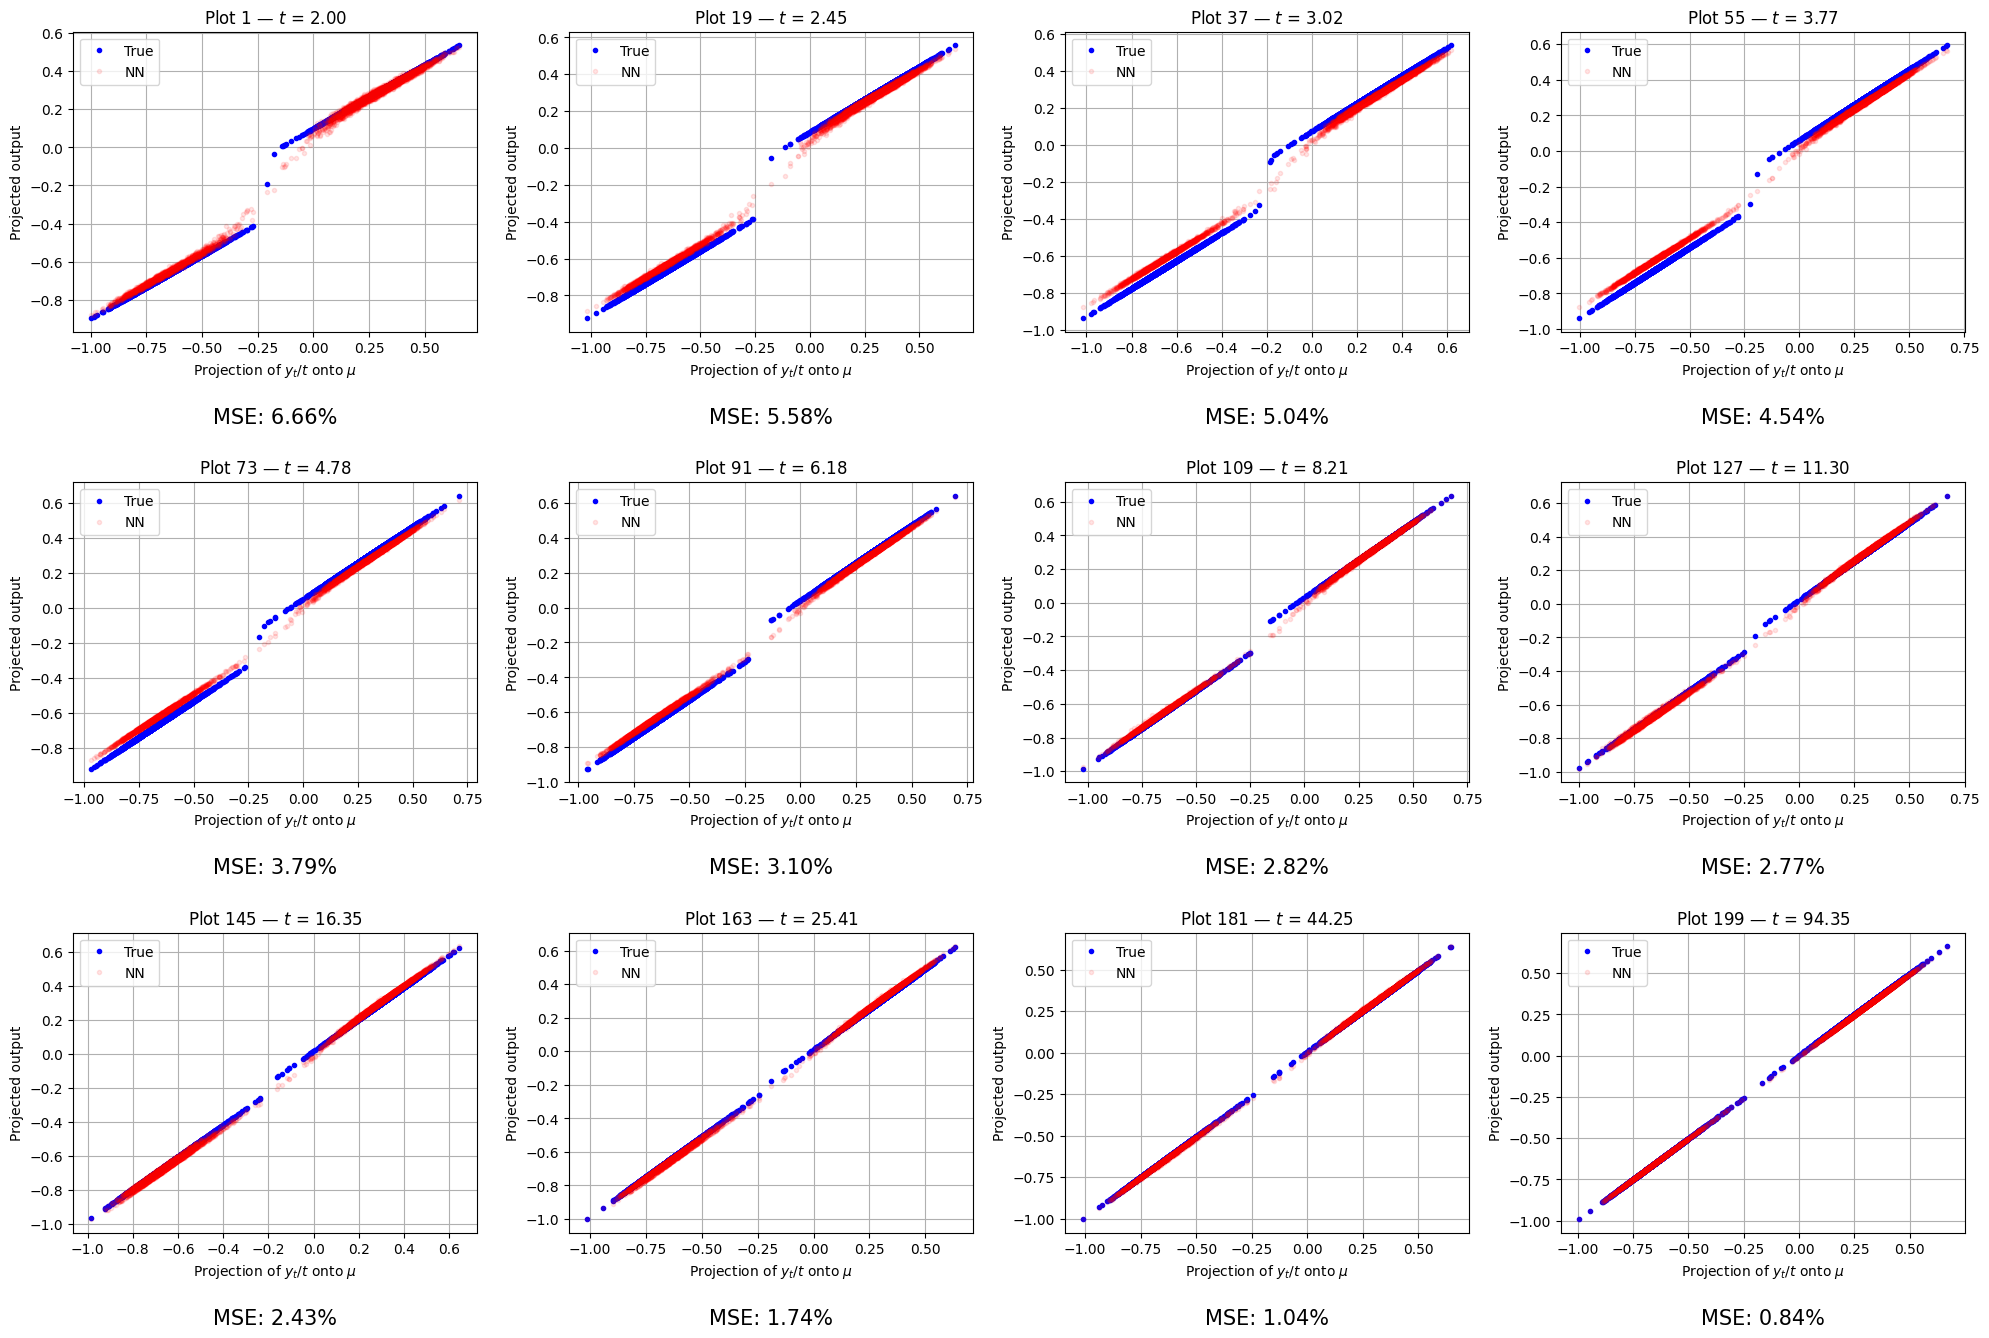

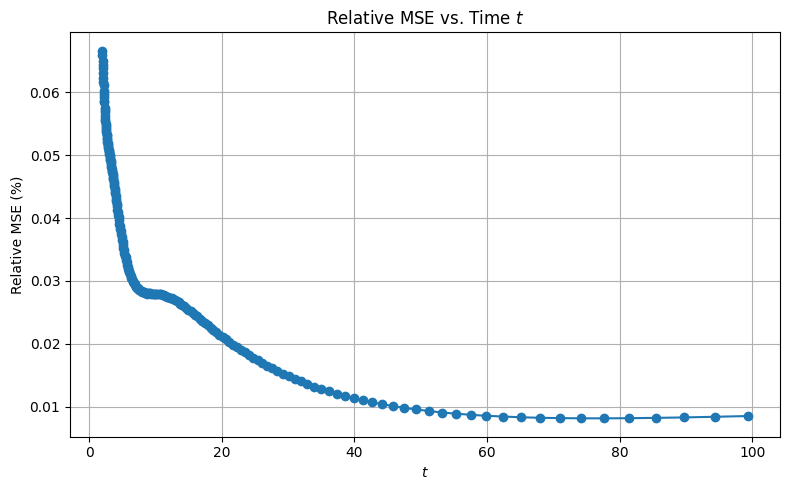

([array(1.9999999, dtype=float32),
  array(2.0221214, dtype=float32),
  array(2.0445297, dtype=float32),
  array(2.0672293, dtype=float32),
  array(2.0902247, dtype=float32),
  array(2.1135225, dtype=float32),
  array(2.137127, dtype=float32),
  array(2.1610434, dtype=float32),
  array(2.185277, dtype=float32),
  array(2.209834, dtype=float32),
  array(2.2347195, dtype=float32),
  array(2.2599394, dtype=float32),
  array(2.285499, dtype=float32),
  array(2.3114057, dtype=float32),
  array(2.337665, dtype=float32),
  array(2.3642836, dtype=float32),
  array(2.3912668, dtype=float32),
  array(2.4186225, dtype=float32),
  array(2.4463563, dtype=float32),
  array(2.474477, dtype=float32),
  array(2.5029893, dtype=float32),
  array(2.531903, dtype=float32),
  array(2.5612226, dtype=float32),
  array(2.5909586, dtype=float32),
  array(2.6211162, dtype=float32),
  array(2.6517043, dtype=float32),
  array(2.6827323, dtype=float32),
  array(2.714207, dtype=float32),
  array(2.7461383, dtype=flo

In [10]:
evaluate_denoiser_on_gaussian_mixture(denoiser2_sigmoidal, samples, plot_every=18, alpha_max = alpha_change)
evaluate_denoiser_on_gaussian_mixture(denoiser2_linear, samples, plot_every=18, alpha_min=alpha_change)
